## Compute fisher Z transform between FC_sim and FC_emp

Author: Yile Wang

Date: 02/20/2023

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
import scipy
import seaborn as sns
colorcoding = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]

In [23]:
def fisher_z(corr_matrix):
    # Compute the Fisher's z transform of the correlation matrix
    z_matrix = np.arctanh(corr_matrix)
    return z_matrix

In [24]:
# read tvb_para
df = pd.read_excel('/Users/yat-lok/workspaces/data4project/mega_table.xlsx', sheet_name='tvb_parameters')
df_corr = pd.DataFrame()
for grp, case in zip(df['group'], df['caseid']):
    emp_path = '/Users/yat-lok/workspaces/data4project/lateralization/ts_fmri/'+grp+'-TS/'+case+'/'+'ROICorrelation_FisherZ_'+case+'.mat'
    mat = scipy.io.loadmat(emp_path)
    emp_tril = np.tril(np.array(mat['ROICorrelation_FisherZ']), -1)
    emp_vec = emp_tril[np.nonzero(emp_tril)].flatten()
    corr_dict = {'group':grp, 'caseid':case}
    for g in np.arange(0.01, 0.071, 0.01):
        sim_path = '/Users/yat-lok/workspaces/_Goptimal/'+grp+'/'+case+'/'+grp+'_'+case+'_'+str(g)+'.xlsx'
        sim_ts = pd.read_excel(sim_path)
        sim_tril = np.tril(fisher_z(sim_ts.iloc[:,1:].corr().to_numpy()), -1)
        sim_vec = sim_tril[np.nonzero(sim_tril)].flatten()
        corr_dict[str(g)] = np.corrcoef(emp_vec, sim_vec)[0, 1]
    df_corr = pd.concat([df_corr, pd.DataFrame.from_dict([corr_dict])], ignore_index=True)

/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_13457/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_13457/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_13457/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_13457/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_13457/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_13457/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh

In [25]:
df_corr_index = df_corr.set_index('caseid')
df_ci = pd.DataFrame()
for grp, case in zip(df['group'], df['caseid']):
    for i in np.arange(0.01, 0.071, 0.01):
        ci_dict={'group':grp, 'caseid':case, 'Go': i, 'Corr': df_corr_index.loc[case, str(i)]}
        df_ci = pd.concat([df_ci, pd.DataFrame.from_dict([ci_dict])], ignore_index=True)
print(df_ci)

    group caseid    Go      Corr
0     SNC  2820A  0.01  0.028313
1     SNC  2820A  0.02 -0.108012
2     SNC  2820A  0.03 -0.093819
3     SNC  2820A  0.04 -0.088774
4     SNC  2820A  0.05 -0.068173
..    ...    ...   ...       ...
513    AD  7673A  0.03  0.350899
514    AD  7673A  0.04  0.338235
515    AD  7673A  0.05  0.359393
516    AD  7673A  0.06  0.386774
517    AD  7673A  0.07  0.389990

[518 rows x 4 columns]


Text(0, 0.5, 'Correlation Coefficient')

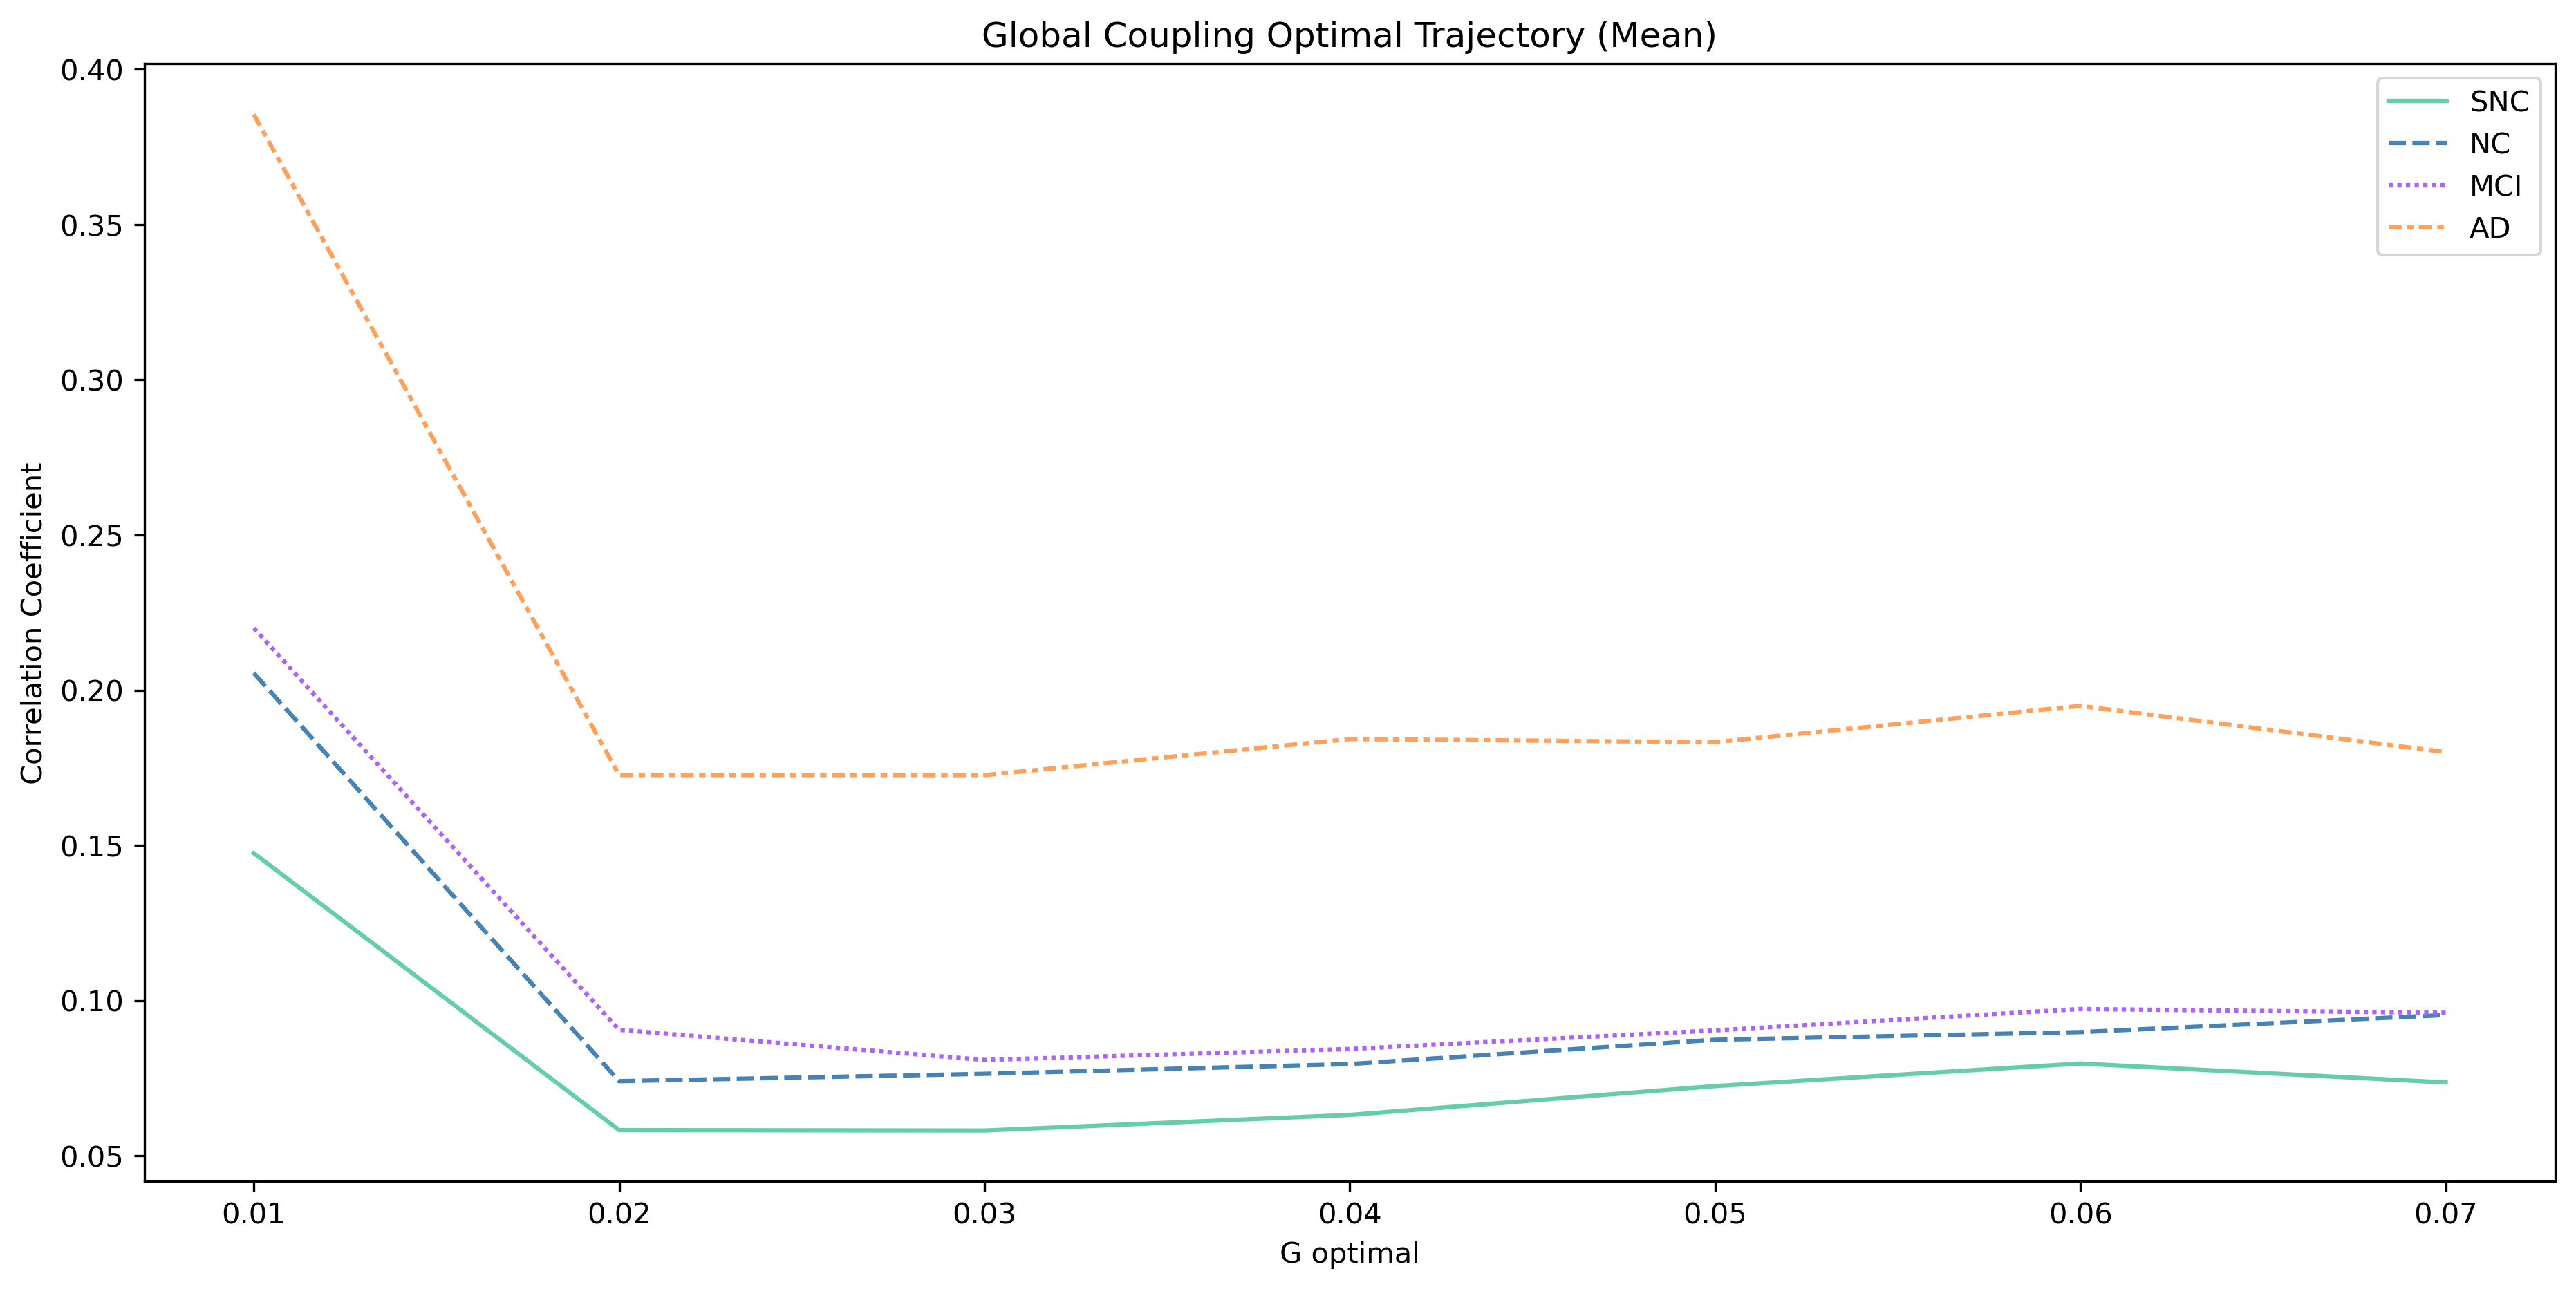

In [26]:
grp_lines = df_corr.groupby(['group']).mean(numeric_only=True)
grp_lines = grp_lines.reindex(['SNC','NC','MCI','AD'])
# order = ['AD','MCI','NC','SNC']
fig, ax = plt.subplots(figsize=(15,7),dpi=300)
ax = sns.lineplot(data=grp_lines.T, palette=colorcoding)
# ax = sns.lineplot(data=df_ci, x='Go', y = 'Corr', hue='group', palette=colorcoding)
# ax = sns.pointplot(data=df_ci, x='Go', y = 'Corr', hue='group', palette=colorcoding)
# ax = sns.violinplot(data=df_ci, x='Go', y='Corr', hue='group', inner=None)
plt.legend()
plt.title('Global Coupling Optimal Trajectory (Mean)')
plt.xlabel('G optimal')
plt.ylabel('Correlation Coefficient')

In [27]:
df_corr.to_excel('/Users/yat-lok/Desktop/go_low_noise_original.xlsx')
grp_lines.to_excel('/Users/yat-lok/Desktop/go_low_noise_group.xlsx')